# Medium Writing Earnings

#### IMPORTS

In [1]:
import pandas as pd
from enum import Enum
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

####  MONTHS LIST

In [2]:
class Month(Enum):
    January = 1
    February = 2
    March = 3
    April = 4
    May = 5
    June = 6
    July = 7
    August = 8
    September = 9
    October = 10
    November = 11
    December = 12

#### STORY CLASS

In [3]:
class Story:
    title = ""
    words = 0
    lectureTime = 0
    
    def __init__(self, title, words, time):
        self.title = title
        self.words = words
        self.lectureTime = time

#### PLATFORM LIST

In [4]:
class Platform(Enum):
    Medium = 1

#### GAIN CLASS

In [5]:
class Gain:
    story = ""
    platform = Platform.Medium
    month = Month.January
    year = 2020
    gain = 0
    
    def __init__(self, story, platform, month, year, gain):
        self.story = story
        self.platform = platform
        self.month = month
        self.year = year
        self.gain = gain

## -- DATA --

#### TAX RATE

In [6]:
Tax = 0.7

#### YOUR STORIES

In [7]:
class Stories(Enum):
    STORY_1_TITLE = Story("My First Story", 500, 3)
    STORY_2_TITLE = Story("My Second Story", 1000, 5)

#### YOUR GAINS

In [8]:
gains = [
    Gain(Stories.STORY_1_TITLE, Platform.Medium, Month.January, 2020, 8.00),
    Gain(Stories.STORY_1_TITLE, Platform.Medium, Month.February, 2020, 9.00),
    Gain(Stories.STORY_1_TITLE, Platform.Medium, Month.March, 2020, 7.00),
    Gain(Stories.STORY_2_TITLE, Platform.Medium, Month.March, 2020, 3.00),
    Gain(Stories.STORY_1_TITLE, Platform.Medium, Month.May, 2020, 9.00),
    Gain(Stories.STORY_2_TITLE, Platform.Medium, Month.May, 2020, 10.00),
    Gain(Stories.STORY_1_TITLE, Platform.Medium, Month.June, 2020, 11.00),
    Gain(Stories.STORY_2_TITLE, Platform.Medium, Month.June, 2020, 7.00)
]

## -- LET THE MAGIC HAPPENED --

In [9]:
# We put all the data into the same array
myData = []
for gain in gains:
    ligne = []
    ligne.append(gain.year) # We get the year
    ligne.append(gain.month.name) # We get the month
    ligne.append(gain.month.value) # We get the month index
    ligne.append(gain.story.value.title) # We get the story
    ligne.append(gain.story.value.words) #We get the word count
    ligne.append(gain.story.value.lectureTime) #We get the length
    ligne.append(gain.platform.name) #We get the plateform
    ligne.append(gain.gain) # Gain before tax
    ligne.append(gain.gain * Tax) # Gain After tax
    myData.append(ligne)   

In [10]:
# We create the Panda Data Frame 
dataFrame = pd.DataFrame(myData, columns=["YEAR","MONTH","MONTHINDEX","STORY","WORD","LECTURETIME","PLATEFORM","GAIN BEF TAX","GAIN AFT TAX"])
dataFrame

,YEAR,MONTH,MONTHINDEX,STORY,WORD,LECTURETIME,PLATEFORM,GAIN BEF TAX,GAIN AFT TAX
0,2020,January,1,My First Story,500,3,Medium,8.0,5.6
1,2020,February,2,My First Story,500,3,Medium,9.0,6.3
2,2020,March,3,My First Story,500,3,Medium,7.0,4.9
3,2020,March,3,My Second Story,1000,5,Medium,3.0,2.1
4,2020,May,5,My First Story,500,3,Medium,9.0,6.3
5,2020,May,5,My Second Story,1000,5,Medium,10.0,7.0
6,2020,June,6,My First Story,500,3,Medium,11.0,7.7
7,2020,June,6,My Second Story,1000,5,Medium,7.0,4.9


## -- TOTAL GAIN PER YEAR --

,YEAR,GAIN AFT TAX
0,2020,44.8


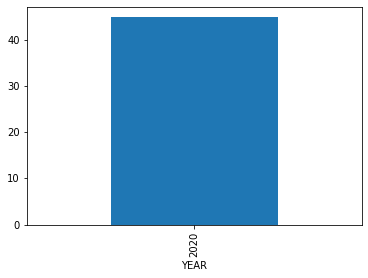

In [11]:
gainsPerYear = dataFrame.groupby(["YEAR"])["GAIN AFT TAX"].sum()
gainsPerYear.to_frame().reset_index()
gainsPerYear.plot(kind='bar')

## -- TOTAL GAIN PER YEAR / PER MONTH --

,YEAR,MONTHINDEX,GAIN AFT TAX
0,2020,1,5.6
1,2020,2,6.3
2,2020,3,7.0
3,2020,5,13.3
4,2020,6,12.6


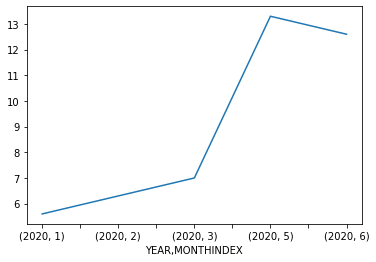

In [12]:
gainsPerYearPerMonth = dataFrame.groupby(["YEAR","MONTHINDEX"])["GAIN AFT TAX"].sum()
gainsPerYearPerMonth.to_frame().reset_index()
gainsPerYearPerMonth.plot(kind='line')

## -- TOTAL GAIN PER STORY --

,STORY,GAIN AFT TAX
0,My First Story,30.8
1,My Second Story,14.0


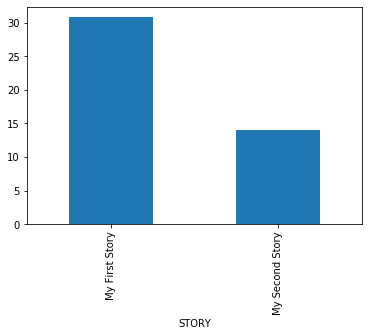

In [13]:
gainsPerStory = dataFrame.groupby(["STORY"])["GAIN AFT TAX"].sum()
gainsPerStory.to_frame().reset_index()
gainsPerStory.plot(kind='bar')